In [2]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../../setigen")
import setigen as stg

/Users/bbrzycki/anaconda3/envs/breakthroughlisten27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tsamp = 18.253611008
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

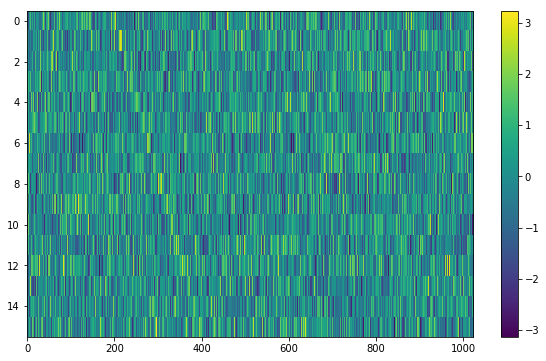

In [3]:
signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                          stg.constant_t_profile(level = 2.0),
                          stg.box_f_profile(width = 0.00001),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
plt.imshow(stg.normalize(stg.inject_noise(signal)), aspect='auto')
plt.colorbar()

(749, -1.9297254985906626e-06, 2.97822192850491)


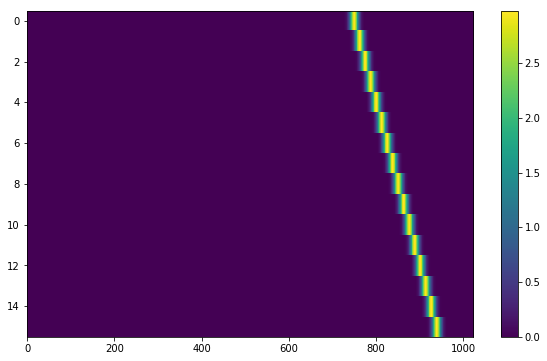

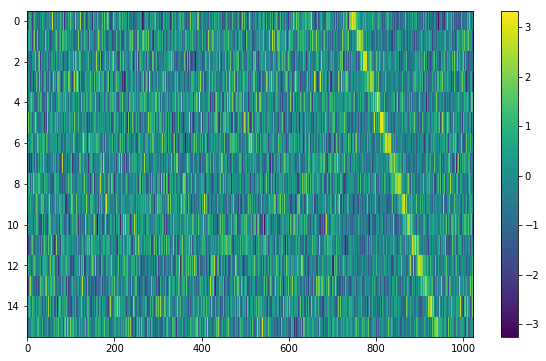

In [7]:
start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
#drift_rate = 0
level = np.random.uniform(1,5)

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = 0.00002),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
fig = plt.figure(figsize=(10,6))

plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()
# plt.imshow(signal)

# normalized_signal = stg.normalize(stg.inject_noise(signal))
# plt.imsave('test_none.png', normalized_signal)
print(start_index, drift_rate, level)

In [7]:
import errno
dirs = ['../data/train/signal/', '../data/train/no_signal/', '../data/validation/signal', '../data/validation/no_signal']
for d in dirs:
    try:
        os.makedirs(d)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

In [13]:
# Generate training and validation data!
datasets = [('train', 1000), ('validation', 400)]

for name, num in datasets:
    
    for i in range(num):

        output_fn = '../data/%s/%s/%s_%04d.png' % (name,'signal','signal',i)

        start_index = np.random.randint(0,fchans)
        drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                                       (fchans-1-start_index)*df/(tsamp*tchans))
        level = np.random.uniform(1,5)

        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                  stg.constant_t_profile(level = level),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

        normalized_signal = stg.normalize(stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal)
        print('Saved %s of %s signal data for %s' % (i, num, name))

    for i in range(num):

        output_fn = '../data/%s/%s/%s_%04d.png' % (name,'no_signal','no_signal',i)

        # level = 0 for no signal
        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[0], drift_rate = 0),
                                  stg.constant_t_profile(level = 0),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

        normalized_signal = stg.normalize(stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal) 
        print('Saved %s of %s no signal data for %s' % (i, num, name))

Saved 0 of 1000 signal data for train
Saved 1 of 1000 signal data for train
Saved 2 of 1000 signal data for train
Saved 3 of 1000 signal data for train
Saved 4 of 1000 signal data for train
Saved 5 of 1000 signal data for train
Saved 6 of 1000 signal data for train
Saved 7 of 1000 signal data for train
Saved 8 of 1000 signal data for train
Saved 9 of 1000 signal data for train
Saved 10 of 1000 signal data for train
Saved 11 of 1000 signal data for train
Saved 12 of 1000 signal data for train
Saved 13 of 1000 signal data for train
Saved 14 of 1000 signal data for train
Saved 15 of 1000 signal data for train
Saved 16 of 1000 signal data for train
Saved 17 of 1000 signal data for train
Saved 18 of 1000 signal data for train
Saved 19 of 1000 signal data for train
Saved 20 of 1000 signal data for train
Saved 21 of 1000 signal data for train
Saved 22 of 1000 signal data for train
Saved 23 of 1000 signal data for train
Saved 24 of 1000 signal data for train
Saved 25 of 1000 signal data for tr